In [1]:
import pandas as pd
import numpy as np
import yfinance
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

In [2]:
ticker = yfinance.Ticker('ASIANPAINT.ns')

In [3]:
df = ticker.history(interval="1d", start="2020-03-15", end="2020-07-15")
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2020-03-16,1751.813487,1751.813487,1654.364573,1659.540161,2867336,0,0,18337.0
2020-03-17,1674.918970,1754.573787,1646.330006,1707.056885,2643189,0,0,18338.0
2020-03-18,1707.451378,1733.625118,1585.208901,1595.264282,3676437,0,0,18339.0
2020-03-19,1518.172719,1630.507594,1410.914754,1578.505249,4906644,0,0,18340.0
2020-03-20,1587.180633,1732.491481,1548.289827,1718.246216,3128629,0,0,18341.0


In [5]:
df = df.loc[:,['Date','Open','High','Low','Close']]

In [6]:
df.head()

,Date,Open,High,Low,Close
Date,,,,,
2020-03-16,18337.0,1751.813487,1751.813487,1654.364573,1659.540161
2020-03-17,18338.0,1674.918970,1754.573787,1646.330006,1707.056885
2020-03-18,18339.0,1707.451378,1733.625118,1585.208901,1595.264282
2020-03-19,18340.0,1518.172719,1630.507594,1410.914754,1578.505249
2020-03-20,18341.0,1587.180633,1732.491481,1548.289827,1718.246216


In [7]:
def plot_all():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  fig.show()

C:\Users\dhing\AppData\Local\Temp/ipykernel_8212/3474337361.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


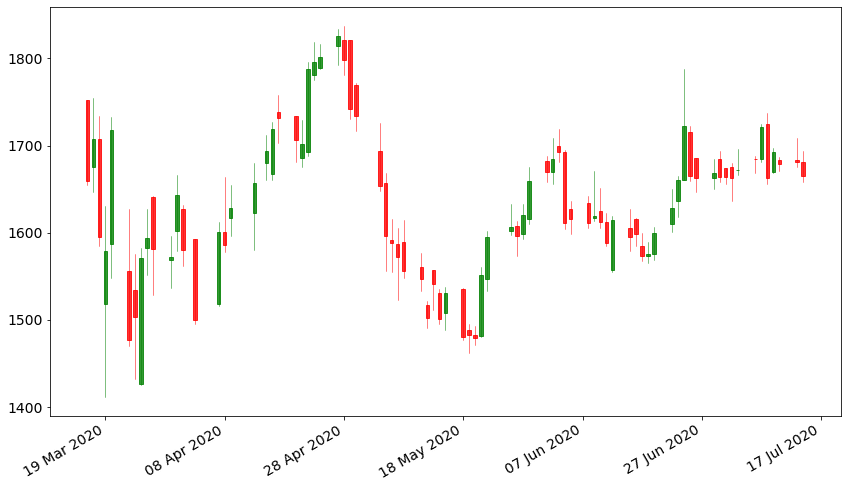

In [9]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
plot_all()

In [10]:
signals = []
for i in range(len(df)):
    if df.iloc[i,4]>df.iloc[i,1]:
        signals.append(1)
    else:
        signals.append(0)
df['Signal'] = signals

In [11]:
df.head()

,Date,Open,High,Low,Close,Signal
Date,,,,,,
2020-03-16,18337.0,1751.813487,1751.813487,1654.364573,1659.540161,0
2020-03-17,18338.0,1674.918970,1754.573787,1646.330006,1707.056885,1
2020-03-18,18339.0,1707.451378,1733.625118,1585.208901,1595.264282,0
2020-03-19,18340.0,1518.172719,1630.507594,1410.914754,1578.505249,1
2020-03-20,18341.0,1587.180633,1732.491481,1548.289827,1718.246216,1


In [12]:
df.tail()

,Date,Open,High,Low,Close,Signal
Date,,,,,,
2020-07-08,18451.0,1725.196163,1736.828963,1656.237656,1662.349731,0
2020-07-09,18452.0,1669.989936,1697.593076,1668.116842,1692.910400,1
2020-07-10,18453.0,1683.742349,1686.749168,1671.173061,1679.355469,0
2020-07-13,18456.0,1683.791522,1708.338623,1675.904910,1681.474854,0
2020-07-14,18457.0,1681.474743,1693.649674,1658.258484,1664.469238,0


In [23]:
#initial
support = df.iloc[0]['Low']
support

1654.3645726098293

In [24]:
#intial
resistance = df.iloc[0]['High']
resistance

1751.8134867316883

In [30]:
breakout_points = []
r = []
dater = []
dater.append(df.iloc[0]['Date'])
s = []
dates = []
dates.append(df.iloc[0]['Date'])
for i in range(len(df)):
    #When support becomes resistance
    if(df.iloc[i]['High'] <= support):
        resistance = support
        r.append(support)
        #Finding new support
        minm = df.iloc[i]['High']
        for k in range(i+1, len(df)):
            if (df.iloc[k]['Low']) >= resistance:
                break
            if (df.iloc[k]['High']) >= resistance:
                break
            if (df.iloc[k]['Low'] <= minm ):
                minm = df.iloc[k]['Low']
            if (df.iloc[k]['High'] <= minm):
                minm = df.iloc[k]['High']
        support = minm
        s.append(support)
    if(df.iloc[i]['Low'] <= support):
        resistance = support
        r.append(support)
        #Finding new support
        minm = df.iloc[i]['Low']
        for k in range(i+1, len(df)):
            if (df.iloc[k]['Low']) >= resistance:
                break
            if (df.iloc[k]['High']) >= resistance:
                break
            if (df.iloc[k]['Low'] <= minm ):
                minm = df.iloc[k]['Low']
            if (df.iloc[k]['High'] <= minm):
                minm = df.iloc[k]['High']
        support = minm
        s.append(support)
    if(df.iloc[i]['Low'] >= resistance):
        support = resistance
        s.append(resistance)
        #Finding new resistance
        maxm = df.iloc[i]['Low']
        for k in range(i+1, len(df)):
            if (df.iloc[k]['Low']) <= support:
                break
            if (df.iloc[k]['High']) <= support:
                break
            if (df.iloc[k]['Low'] >= maxm ):
                maxm = df.iloc[k]['Low']
            if (df.iloc[k]['High'] >= maxm):
                maxm = df.iloc[k]['High']
        resistance = maxm
        r.append(resistance)
    if(df.iloc[i]['High'] >= resistance):
        support = resistance
        s.append(resistance)
        #Finding new resistance
        maxm = df.iloc[i]['High']
        for k in range(i+1, len(df)):
            if (df.iloc[k]['Low']) <= support:
                break
            if (df.iloc[k]['High']) <= support:
                break
            if (df.iloc[k]['Low'] >= maxm ):
                maxm = df.iloc[k]['Low']
            if (df.iloc[k]['High'] >= maxm):
                maxm = df.iloc[k]['High']
        resistance = maxm
        r.append(resistance)

In [26]:
len(r)

28

In [27]:
r

[1654.3645726098293,
 1654.3645726098293,
 1751.8134867316883,
 1654.3645726098293,
 1754.5737870723726,
 1654.3645726098293,
 1733.6251180651027,
 1654.3645726098293,
 1630.5075937805966,
 1630.5075937805966,
 1630.5075937805966,
 1732.4914806657096,
 1630.5075937805966,
 1425.5049587064982,
 1837.5803255632052,
 1837.5803255632052,
 1837.5803255632052,
 1461.9314315498366,
 1788.0428137910915,
 1788.0428137910915,
 1788.0428137910915,
 1636.5702534078748,
 1736.8289625083896,
 1736.8289625083896,
 1736.8289625083896,
 1658.258484122014,
 1658.258484122014,
 1693.649674258658]

In [28]:
len(s)

28

In [29]:
s

[1654.3645726098293,
 1654.3645726098293,
 1654.3645726098293,
 1646.3300056318997,
 1654.3645726098293,
 1410.9147540714553,
 1654.3645726098293,
 1630.5075937805966,
 1410.9147540714553,
 1630.5075937805966,
 1425.5049587064982,
 1630.5075937805966,
 1425.5049587064982,
 1425.5049587064982,
 1425.5049587064982,
 1837.5803255632052,
 1461.9314315498366,
 1461.9314315498366,
 1461.9314315498366,
 1788.0428137910915,
 1636.5702534078748,
 1636.5702534078748,
 1636.5702534078748,
 1736.8289625083896,
 1658.258484122014,
 1658.258484122014,
 1658.258484122014,
 1658.258484122014]